# Personal introduction
by Dan Velev (d.velev@student.fontys.nl)

## Summary
The notebook gives a summary of the Week 2 Assignment 5 of Data Visualization, where I will dive deep into paying attention to details in a plot.

## Introduction
Following the tutorial steps in ADS-DV Week 2 Assignment 2, I will be working with a people's heights data set. I am going to plot the data and focus more on the design of the plot. In this assignment I am using the tableau colors to make the graph more attractive. 

## Recreating a plot
I am going to recreate the first plot from the following article ( http://www.randalolson.com/2014/06/23/why-the-dutch-are-so-tall/ )

But first I am going to download the dataset and clean it by interpolating missing data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heights = pd.read_csv('http://files.figshare.com/1545826/world_heights.csv')
heights_cleaned = heights.interpolate()
heights_cleaned.head(5)

,Year,The Netherlands,Italy,France,Sweden,U.S.A.,Germany,Denmark
0,1818,163.79,NaN,NaN,NaN,NaN,NaN,NaN
1,1819,164.46,NaN,NaN,NaN,NaN,NaN,NaN
2,1820,164.72,NaN,NaN,NaN,173.00,NaN,NaN
3,1821,164.71,NaN,NaN,NaN,173.05,NaN,NaN
4,1822,164.81,NaN,NaN,NaN,173.10,NaN,NaN


Then I am going to set up Tableu colors as RGB, in order to make our plot more attractive.

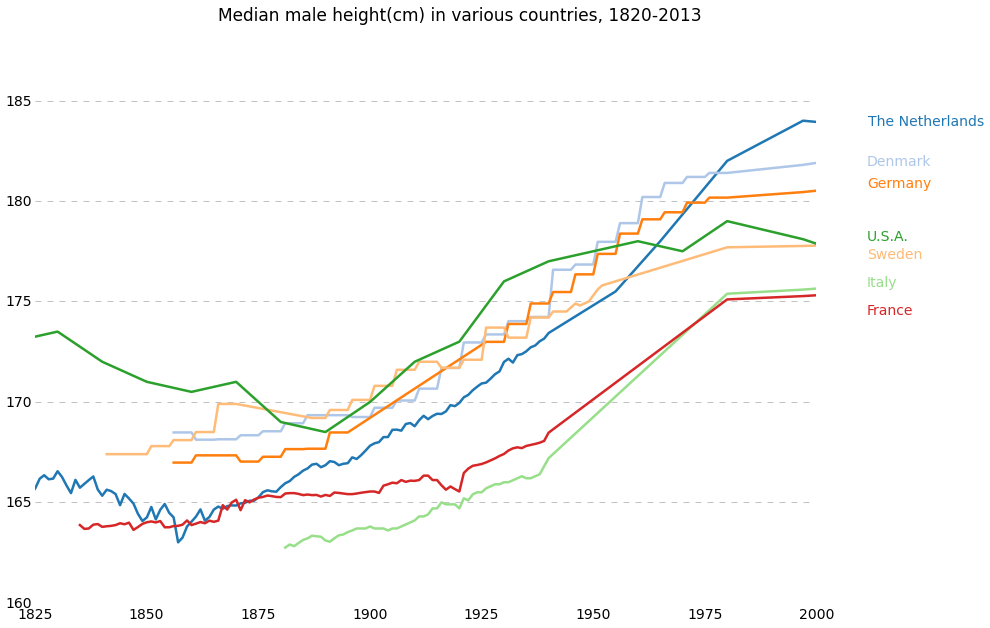

In [72]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling RGB values to [0,1] range, matplotlib format
for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] = (r/255., g/255., b/255.)
    
plt.figure(figsize=(14,9))

# Remove the plot frames
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Axis ticks shown only on the bottom and left of the plot
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.ylim(160,185)
plt.xlim(1825,2000)

plt.yticks(fontsize=14)
plt.xticks(range(1825,2005,25),fontsize=14)

for y in range(160,190,5):
    plt.plot(range(1825,2000), [y] * len(range(1825,2000)), "--", lw=0.8, color='black',alpha=0.3)
    
# Remove tick marks
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on', left='off', right='off', labelleft='on')

# Now when the plot is ready its time to plot the data
majors = ['The Netherlands', 'Denmark', 'Germany', 'Sweden', 'U.S.A.', 'Italy', 'France']

for rank,column in enumerate(majors):
    #plot each line separately with its own color
    plt.plot(heights_cleaned.Year.values, heights_cleaned[column.replace('\n',' ')].values, lw=2.5, color=tableau20[rank])
    
    # Add text label to the right of each line
    y_pos = heights_cleaned[column.replace('\n',' ')].values[-1] - 0.5
    if column == 'The Netherlands':
        y_pos += 0.5
    elif column == 'Denmark':
        y_pos -= 0.3
    elif column == 'Germany':
        y_pos += 0.2
    elif column == 'U.S.A.':
        y_pos += 2.25
    elif column == 'Sweden':
        y_pos -= 0.25
    elif column == 'Italy':
        y_pos += 0.25
    elif column == 'France':
        y_pos -= 0.75
        
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])
    
# Title; because the matplotlib's title() does center it on the plot but not on the graph
plt.text(1920, 189, "Median male height(cm) in various countries, 1820-2013", fontsize=17, ha="center") 